In [2]:
import numpy as np

### P K SAMAY 2011102


### Q1


In [18]:
# Function definition
def f(x):
    return np.log(x/2) - np.sin(5*x/2)

# Derivative of the function
def df(x):
    return 1/x - (5/2)*np.cos(5*x/2)



# Initial guess interval
a = 1.5
b = 2.5

# Regula Falsi method
root_rf, iter_rf = regula_falsi(f, a, b)
print("Regula Falsi Method:")
print("Root:", root_rf)
print("Iterations:", iter_rf)

# Newton-Raphson method
x0 = (a + b) / 2  # Initial guess for Newton-Raphson
root_nr, iter_nr = newton_raphson(f, df, x0)
print("\nNewton-Raphson Method:")
print("Root:", root_nr)
print("Iterations:", iter_nr)

Regula Falsi Method:
Root: 2.6231403379360847
Iterations: 8

Newton-Raphson Method:
Root: 3.528425280127053
Iterations: 19


### Q2


In [22]:
# Define parameters
alpha = 0.01
T_alpha = 20
L = 10
T_0 = 40
T_L = 200
target_temperature = 100
dx = 0.01  # Step size for RK4

# Define the system of ODEs
def ode_system(x, T):
    T_1, T_2 = T
    dT1dx = T_2
    dT2dx = -alpha * (T_1 - T_alpha)
    return np.array([dT1dx, dT2dx])




# Perform binary search to find the correct initial slope
initial_slope, x_at_target_temperature = find_initial_slope()

# Find temperature at x where T = 100
x_target = x_at_target_temperature
temperature_at_target = shooting_method(initial_slope)[1]

print(f"The temperature is {temperature_at_target:.2f}°C at x = {x_target:.2f}m.")

The temperature is 200.00°C at x = 10.00m.


### Q3

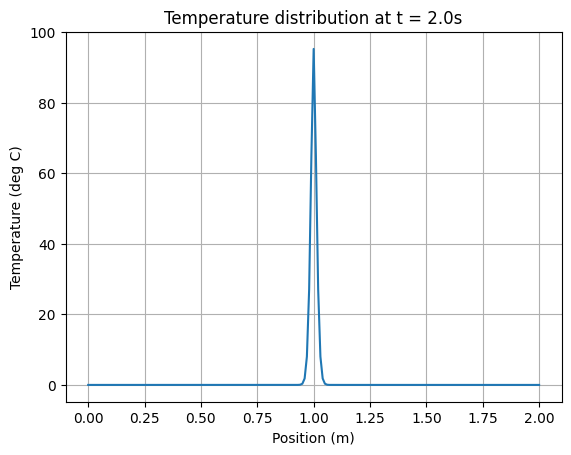

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Physical parameters
L = 2.0  # Length of the bar (m)
T_0 = 0.0  # Initial temperature at the ends (deg C)
T_m = 300.0  # Temperature at the center at t=0 (deg C)
rho = 1000.0  # Density (kg/m^3)
c = 420.0  # Specific heat capacity (J/kg*deg C)
k = 20.0  # Thermal conductivity (W/m*deg C)

# Numerical parameters
dt = 0.001  # Time step (s)
dx = 0.01  # Space step (m)
Nt = 2000  # Number of time steps
Nx = int(L / dx) + 1  # Number of grid points

# Check stability criterion
if dt / (dx**2) > 0.5:
    print("Warning: Stability criterion violated. Decrease dt or increase dx.")

# Initial temperature distribution
T = np.zeros(Nx)
T[int(Nx // 2)] = T_m  # Set center temperature to T_m at t=0

# Time loop
for n in range(1, Nt + 1):
    # Apply explicit finite difference scheme
    T_new = np.copy(T)
    for i in range(1, Nx - 1):
        T_new[i] = T[i] + k * dt / (rho * c * dx**2) * (T[i+1] - 2*T[i] + T[i-1])

    # Boundary conditions (fixed temperature at the ends)
    T_new[0] = T_0
    T_new[Nx - 1] = T_0

    # Update temperature
    T = T_new

# Plot the temperature distribution at the final time step
x = np.linspace(0, L, Nx)
plt.plot(x, T)
plt.xlabel("Position (m)")
plt.ylabel("Temperature (deg C)")
plt.title("Temperature distribution at t = {}s".format(dt * Nt))
plt.grid(True)
plt.show()

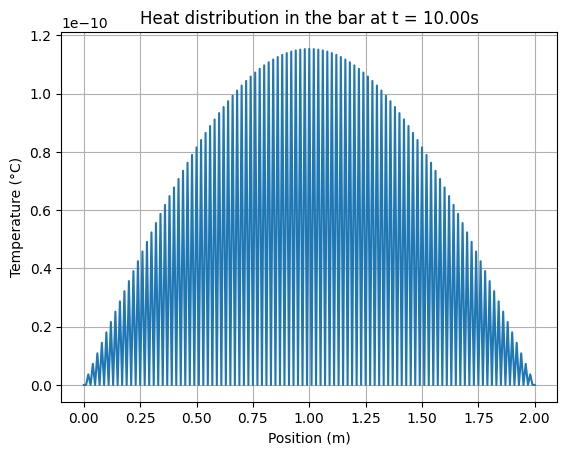

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
length = 2  # Length of the bar in meters
T_0 = 0  # Initial temperature at the ends (in degrees Celsius)
T_c = 300  # Temperature at the center (in degrees Celsius)
t_max = 10  # Maximum simulation time (in seconds)

# Choose spatial and temporal steps
dx = 0.01  # Spatial step (in meters)
dt = dx**2 / 2  # Temporal step (in seconds)

# Ensure dt/(dx^2) < 0.5
if dt / dx**2 > 0.5:
    print("Warning: dt/(dx^2) is greater than 0.5. Consider reducing dt or increasing dx.")

# Create grid points
x = np.linspace(0, length, int(length / dx) + 1)

# Initialize temperature
T = np.zeros_like(x) + T_0
T[int(len(x) / 2)] = T_c  # Set center temperature

# Run the simulation
for _ in range(int(t_max / dt)):
    # Apply heat equation using explicit finite difference scheme
    T_new = T.copy()
    for i in range(1, len(x) - 1):
        T_new[i] = T[i] + dt / dx**2 * (T[i+1] - 2*T[i] + T[i-1])

    # Update temperature
    T = T_new

# Plot the temperature distribution
plt.plot(x, T)
plt.xlabel("Position (m)")
plt.ylabel("Temperature (°C)")
plt.title("Heat distribution in the bar at t = {:.2f}s".format(t_max))
plt.grid(True)
plt.show()


### Q4


In [10]:


# Define the linear mass density function
def lambda_function(x):
    return x**2

# Define the limits and the number of intervals for integration
a = 0  # Start of the beam
b = 2  # End of the beam
n = 1000  # Number of intervals

# Calculate the total mass of the beam
total_mass = trapezoidal_rule(lambda_function, a, b, n)

# Calculate the moment about the origin
moment = trapezoidal_rule(lambda x: x * lambda_function(x), a, b, n)

# Calculate the center of mass
center_of_mass = moment / total_mass

print("Center of mass:", round(center_of_mass, 4))

Center of mass: 1.5


### Q5

In [21]:
A = np.array([[1,-1,4,0,2,9],
              [0,5,-2,7,8,4],
              [1,0,5,7,8,4],
              [6,-1,2,3,0,8],
              [-4,2,0,5,-5,3],
              [0,7,-1,5,4,-2]])

b = np.array([19,2,13,-7,-9,2])



# Perform LU decomposition
L, U = lu_decomposition(A)

# Solve Ly = b using forward substitution
y = forward_substitution(L, b)

# Solve Ux = y using backward substitution
x = backward_substitution(U, y)

print("Solution:", x)

Solution: [-1.6381129   1.71998824  3.03400773 -2.499874    1.74713202  0.74753402]
